In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
tf.logging.set_verbosity(tf.logging.ERROR)

Using TensorFlow backend.


In [2]:
# 避免動態分配 GPU 和 CPU 的問題(Blas GEMM launch failed)
# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
# tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [3]:
# 第一步：選擇模型，順序模型是多個網絡層的線性堆疊
model = Sequential()

# 第二步：構建網絡層
# 輸入層：28 * 28 = 784
model.add(Dense(500, input_shape=(784,)))
model.add(Activation('relu')) # 激活函數是 ReLU
# 隱藏層：節點 500 個
model.add(Dense(500))
model.add(Activation('relu'))  
# 隱藏層：節點 500 個
model.add(Dense(500))
model.add(Activation('relu'))
# 隱藏層：節點 500 個
model.add(Dense(500))
model.add(Activation('relu'))
# 輸出層：結果是 10 個類別
model.add(Dense(10))
model.add(Activation('softmax')) # 激活函數是 softmax

In [4]:
# 輸出模型摘要資訊
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_3 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 500)               250500    
__________

In [5]:
# 第三步：編譯模型
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# 第四步：資料分割
# 使用 Keras 自帶的 mnist 工具讀取數據
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
def normalize_mnist_data(x, y):
    x = x.reshape(x.shape[0], x.shape[1] * x.shape[2]) # 改變 MNIST 輸入數據的維度從 (-1, 28, 28) 至 (-1, 784)
    y = (y[:, None] == np.arange(np.unique(y).shape[0])).astype(int) # 讀熱編碼使輸出數據的維度從 (-1) 至 (-1, 10)
    return x, y

def normalize_result(x, y):
    print('x.shape:', x.shape)
    print('y.shape:', y.shape)

In [8]:
print('Before normalization:')
normalize_result(X_train, y_train)

Before normalization:
x.shape: (60000, 28, 28)
y.shape: (60000,)


In [9]:
print('After normalization:')
X_train, y_train = normalize_mnist_data(X_train, y_train)
X_test, y_test = normalize_mnist_data(X_test, y_test)
normalize_result(X_train, y_train)

After normalization:
x.shape: (60000, 784)
y.shape: (60000, 10)


In [10]:
# 第五步：訓練模型
# epochs: 訓練次數
# batch_size: 對總樣本數進行分組，每組包含的樣本數量
# validation_split: 用來做交叉驗證樣本數量的百分比
# shuffle: 是否把數據隨機打亂之後再進行訓練
# verbose: 屏顯模式，0: 不輸出，1: 輸出進度，2: 輸出每次的訓練結果
train_history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.3, shuffle=True, verbose=2)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
 - 12s - loss: 2.8831 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 2/20
 - 14s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 3/20
 - 12s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 4/20
 - 14s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 5/20
 - 14s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 6/20
 - 13s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 7/20
 - 12s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 8/20
 - 12s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 9/20
 - 13s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 10/20
 - 12s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 11/20
 - 13s - loss: 2.8847 - acc: 0.8200 - val_loss: 2.8963 - val_acc: 0.8193
Epoch 12/20
 - 12s - los

In [11]:
# 第六步：輸出結果
scores = model.evaluate(X_test, y_test, batch_size=200, verbose=0)
for i, metrics_name in enumerate(model.metrics_names):
    print('The test {} is {:.3f}'.format(metrics_name, scores[i]))

The test loss is 2.883
The test acc is 0.820


In [12]:
y_pred = model.predict(X_test, batch_size=200, verbose=0)
y_pred

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [13]:
y_pred_label = np.argmax(y_pred, axis=1)
y_test_label = np.argmax(y_test, axis=1)
y_correct_prediction = np.equal(y_pred_label, y_test_label)
print('The accuracy of the model is {:.3f}'.format(np.sum(y_correct_prediction) / y_correct_prediction.shape[0]))

The accuracy of the model is 0.101


In [14]:
def show_train_history(train_history, train_hst_name, val_hst_name):
    plt.plot(train_history.history[train_hst_name])
    plt.plot(train_history.history[val_hst_name])
    plt.xlabel('Epoch')
    plt.ylabel(train_hst_name)
    plt.title('Train History')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

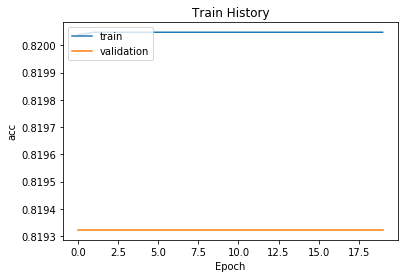

In [15]:
show_train_history(train_history, 'acc', 'val_acc')

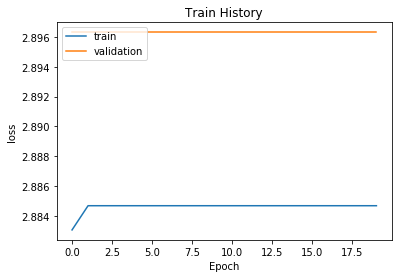

In [16]:
show_train_history(train_history, 'loss', 'val_loss')

## 作業
    
(1) 以 Adam 為例, 調整 batch_size, epoch, 觀察 accurancy, loss 的變化
    
(2) 以同一模型, 分別驗證 SGD, Adam, Rmsprop 的 accurancy